In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as datetime
from datetime import time, timedelta
from matplotlib import dates
import os
from pathlib import Path
print(Path.cwd())
Path = Path.cwd()

/Users/cbrun/Documents/PROJETS/GC2021/COBRA_fev2023/RESULTAT_meteo


In [25]:
pwd

'/Users/cbrun/Documents/PROJETS/GC2021/COBRA_fev2023/RESULTAT_meteo'

In [3]:
cd RESULTAT_meteo/

/Users/cbrun/Documents/PROJETS/GC2021/COBRA_fev2023/RESULTAT_meteo


In [43]:
file_path = 'meteo_GC_fev2023.nc'
r3 = nc.Dataset(file_path, 'r', format='NETCDF4')
print(r3)
print(r3['time'][:])
print(r3['air temperature'][:])
print(r3['surface temperature'][:])
#time_meteo=r3['time'][:]
time_meteo = pd.to_datetime(r3['time'][:])
n=len(time_meteo)
temperature=r3['air temperature'][:]
rhumidite=r3['air relative humidity'][:]
temperature_surf=r3['surface temperature'][:]
vitesse_norm=r3['velocity norm'][:]
vitesse_dir=r3['velocity direction'][:]
LWUP=r3['net surface radiation'][:]
eps=0.99 #0.9 #0.99
eps2=0.6
sigma=5.67e-8
LWDN=eps2*sigma*(temperature+273.15)**4
LWCO=(LWUP-(1.-eps)*LWDN)
temperature_scor=np.sqrt(np.sqrt(np.abs(LWCO/eps/sigma)))-273.15
serie_un = pd.Series(vitesse_norm,index=time_meteo)
#serie_un = serie_un.sort_index()
UN = serie_un.resample('30min').mean()
serie_ud = pd.Series(vitesse_dir,index=time_meteo)
#serie_un = serie_un.sort_index()
UD = serie_ud.resample('30min').mean()
serie_T = pd.Series(temperature,index=time_meteo)
serie_TS = pd.Series(temperature_surf,index=time_meteo)
TT = serie_T.resample('30min').mean()
TS = serie_TS.resample('30min').mean()
print(time_meteo)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): t(10612)
    variables(dimensions): float64 time(t), float64 pression(t), float64 air temperature(t), float64 air relative humidity(t), float64 velocity norm(t), float64 velocity direction(t), float64 velocity x(t), float64 velocity y(t), float64 surface temperature(t), float64 net surface radiation(t)
    groups: 
[1.67544492e+18 1.67544504e+18 1.67544516e+18 ... 1.67678832e+18
 1.67691588e+18 1.67691600e+18]
[ 4.734  4.642  4.697 ...  4.817 12.    11.65 ]
[-3.699 -3.616 -3.594 ... -2.869  1.997  1.761]
DatetimeIndex(['2023-02-03 17:22:00', '2023-02-03 17:24:00',
               '2023-02-03 17:26:00', '2023-02-03 17:28:00',
               '2023-02-03 17:30:00', '2023-02-03 17:32:00',
               '2023-02-03 17:34:00', '2023-02-03 17:40:00',
               '2023-02-03 17:42:00', '2023-02-03 17:44:00',
               ...
               '2023-02-19 06:18:00', '2023-02-19 06:20:0

In [4]:
file_path = 'meteo_Clairiere_dec2022.nc'
r4 = nc.Dataset(file_path, 'r', format='NETCDF4')
print(r4)
print(r4['time'][:])
print(r4['air temperature'][:])
print(r4['surface temperature'][:])
#time_meteo=r4['times'][:]
time_meteo = pd.to_datetime(r4['time'][:])
temperature=r4['air temperature'][:]
temperature_surf=r4['surface temperature'][:]
#temperature_surf=r4['Surface_Temperature'][:]
pression=r4['pression'][:]
print(time_meteo)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): t(31583)
    variables(dimensions): float64 time(t), float64 pression(t), float64 air temperature(t), float64 air relative humidity(t), float64 velocity norm(t), float64 velocity direction(t), float64 velocity x(t), float64 velocity y(t), float64 surface temperature(t), float64 net surface radiation(t)
    groups: 
[1.67144940e+18 1.67144952e+18 1.67144964e+18 ... 1.67535708e+18
 1.67535720e+18 1.67535732e+18]
[1.572 1.572 1.54  ... 1.574 1.529 1.537]
[ 0.157  0.171  0.178 ... -1.082 -1.04  -1.057]
DatetimeIndex(['2022-12-19 11:30:00', '2022-12-19 11:32:00',
               '2022-12-19 11:34:00', '2022-12-19 11:36:00',
               '2022-12-19 11:38:00', '2022-12-19 11:40:00',
               '2022-12-19 11:42:00', '2022-12-19 11:44:00',
               '2022-12-19 11:46:00', '2022-12-19 11:48:00',
               ...
               '2023-02-02 16:44:00', '2023-02-02 16:46:00',
  

In [27]:
file='fw_pt100.nc'
r5 = nc.Dataset(file, 'r', format='NETCDF4')
print(r5)
print(r5['time'][:])
print(r5['Temp_C(1)'][:])
time_fw3 = pd.to_datetime(r5['time'][:])
temperature_1=r5['Temp_C(1)'][:]
temperature_2=r5['Temp_C(2)'][:]
#temperature_3=r5['Temp_C(3)'][:]  FW3 ou porte sonde KO
temperature_4=r5['Temp_C(4)'][:]
temperature_5=r5['Temp_C(5)'][:]
temperature_grnd=r5['PT100'][:]
alpha=r5['csatB_Pitch'][:]
beta=r5['csatB_Roll'][:]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): t(2635192)
    variables(dimensions): float64 time(t), float64 Temp_C(1)(t), float64 Temp_C(2)(t), float64 Temp_C(3)(t), float64 Temp_C(4)(t), float64 Temp_C(5)(t), float64 PT100(t), float64 csatB_Pitch(t), float64 csatB_Roll(t)
    groups: 
[1.67547075e+18 1.67547075e+18 1.67547075e+18 ... 1.67810655e+18
 1.67810656e+18 1.67810656e+18]
[  nan   nan   nan ... 3.06  3.073 3.117]


In [29]:
serieT1 = pd.Series(temperature_1,index=time_fw3)
serieT2 = pd.Series(temperature_2,index=time_fw3)
#serieT3 = pd.Series(temperature_3,index=time_fw3)
serieT4 = pd.Series(temperature_4,index=time_fw3)
serieT5 = pd.Series(temperature_5,index=time_fw3)
serieTG = pd.Series(temperature_grnd,index=time_fw3)
#series = series.sort_index()
#df = pd.DataFrame(temperature,index=time_meteo)
#df = df.sort_index()
#df = pd.DataFrame({'s': series})
#Tmean = df.asfreq(freq='60S')
#print(series2)
#print(series3)
#print(df)
#pd.date_range(start='4/2/2023', stop='20/2/2023',freq='60S')
#df[df.index.duplicated()]
#T3 = series3.asfreq(freq='2min')
#Tmean2 = series2.resample('2min').mean()
T1h1 = serieT1.resample('1H').mean()
T1h2 = serieT2.resample('1H').mean()
#T1h3 = serieT3.resample('1H').mean()
T1h4 = serieT4.resample('1H').mean()
T1h5 = serieT5.resample('1H').mean()
T1hG = serieTG.resample('1H').mean()
#series[series.index.duplicated()]

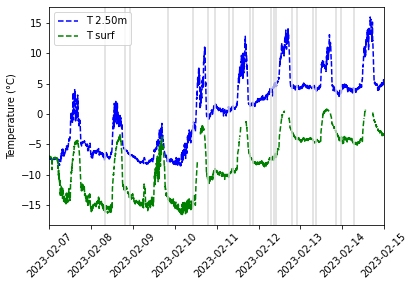

In [40]:
fig = plt.figure()
plt.plot(time_meteo, temperature,'b--', label='T 2.50m')
plt.plot(time_meteo, temperature_surf,'g--', label='T surf')
#plt.plot(time_meteo, temperature_scor,'r--', label='T scor')
plt.ylabel('Temperature (°C)')
tmax=np.datetime64('2023-02-19 08:00')
tmin=np.datetime64('2023-02-05')
tmax=np.datetime64('2023-02-15')
tmin=np.datetime64('2023-02-07')
#plt.legend()
plt.xlim(tmin,tmax)
p1 = np.datetime64('2023-02-08 07:58')
p2 = np.datetime64('2023-02-08 19:28')
p3 = np.datetime64('2023-02-08 22:11')
p4 = np.datetime64('2023-02-09 19:49')
p5 = np.datetime64('2023-02-10 10:15')
p6 = np.datetime64('2023-02-10 19:16')
p7 = np.datetime64('2023-02-10 22:45')
p8 = np.datetime64('2023-02-11 07:00')
p9 = np.datetime64('2023-02-11 09:37')
p10 = np.datetime64('2023-02-11 19:00')
p11 = np.datetime64('2023-02-11 21:00')
p12 = np.datetime64('2023-02-12 07:00')
p13 = np.datetime64('2023-02-12 09:00')
p14 = np.datetime64('2023-02-12 10:00')
p15 = np.datetime64('2023-02-12 19:00')
p16 = np.datetime64('2023-02-12 22:00')
p17 = np.datetime64('2023-02-13 07:00')
p18 = np.datetime64('2023-02-13 09:00')
p19 = np.datetime64('2023-02-13 20:30')
t1 = np.datetime64('2023-02-13 23:00')
t2 = np.datetime64('2023-02-14 07:00')
p20 = np.datetime64('2023-02-18 20:00')
p21 = np.datetime64('2023-02-18 22:00')
p22 = np.datetime64('2023-02-19 07:00')
p23 = np.datetime64('2023-02-20 21:00')

#f1 = np.datetime64('2023-02-08 09:00')
#xlocator = dates.MinuteLocator(byminute=[0,30], interval = 1)
#dfmt = dates.DateFormatter('%H:%M')
#i = d1-timedelta(minutes=1)
#f = f1+timedelta(minutes=1)
#ax.set_xlim(i,f)
#ax.grid()
#ax.axvspan(d1,f1, color='gainsboro')
plt.axvline(p1, color='gainsboro')
plt.axvline(p2, color='gainsboro')
plt.axvline(p3, color='gainsboro')
plt.axvline(p4, color='gainsboro')
plt.axvline(p5, color='gainsboro')
plt.axvline(p6, color='gainsboro')
plt.axvline(p7, color='gainsboro')
plt.axvline(p8, color='gainsboro')
plt.axvline(p9, color='gainsboro')
plt.axvline(p10, color='gainsboro')
plt.axvline(p11, color='gainsboro')
plt.axvline(p12, color='gainsboro')
plt.axvline(p13, color='gainsboro')
plt.axvline(p14, color='gainsboro')
plt.axvline(p15, color='gainsboro')
plt.axvline(p16, color='gainsboro')
plt.axvline(p17, color='gainsboro')
plt.axvline(p18, color='gainsboro')
plt.axvline(t1, color='gainsboro')
plt.axvline(t2, color='gainsboro')
plt.axvline(p19, color='gainsboro')
plt.axvline(p20, color='gainsboro')
plt.axvline(p21, color='gainsboro')
plt.axvline(p22, color='gainsboro')
plt.axvline(p23, color='gainsboro')
#ax.xaxis.set_major_formatter(dfmt)
plt.legend()
#ax = plt.gca()
hours = dates.HourLocator()
dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("T_GC_2m5.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

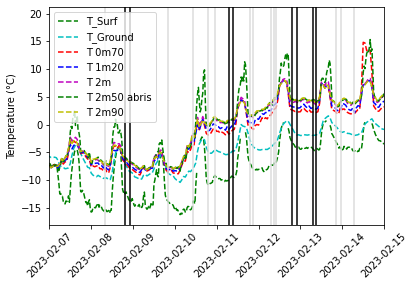

In [48]:
fig = plt.figure()
#plt.plot(T1h3,'g--', label='T 0m')
plt.plot(TS,'g--', label='T_Surf')
plt.plot(T1hG,'c--', label='T_Ground')
plt.plot(T1h1,'r--', label='T 0m70')
plt.plot(T1h2,'b--', label='T 1m20')
plt.plot(T1h4,'m--', label='T 2m')
plt.plot(TT,'g--', label='T 2m50 abris')
plt.plot(T1h5,'y--', label='T 2m90')
plt.ylabel('Temperature (°C)')
tmax=np.datetime64('2023-02-19 08:00')
tmin=np.datetime64('2023-02-05')
tmax=np.datetime64('2023-02-15')
tmin=np.datetime64('2023-02-07')
plt.axvline(p1, color='gainsboro')
plt.axvline(p2, color='black')
plt.axvline(p3, color='black')
plt.axvline(p4, color='gainsboro')
plt.axvline(p5, color='gainsboro')
plt.axvline(p6, color='gainsboro')
plt.axvline(p7, color='gainsboro')
plt.axvline(p8, color='black')
plt.axvline(p9, color='black')
plt.axvline(p10, color='gainsboro')
plt.axvline(p11, color='gainsboro')
plt.axvline(p12, color='gainsboro')
plt.axvline(p13, color='gainsboro')
plt.axvline(p14, color='gainsboro')
plt.axvline(p15, color='black')
plt.axvline(p16, color='black')
plt.axvline(p17, color='black')
plt.axvline(p18, color='black')
plt.axvline(t1, color='gainsboro')
plt.axvline(t2, color='gainsboro')
plt.axvline(p19, color='gainsboro')
plt.axvline(p20, color='gainsboro')
plt.axvline(p21, color='gainsboro')
plt.axvline(p22, color='gainsboro')
plt.axvline(p23, color='gainsboro')
#plt.legend()
plt.xlim(tmin,tmax)
plt.legend()
#ax = plt.gca()
hours = dates.HourLocator()
dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("T_GC_fw.pdf", bbox_inches='tight')

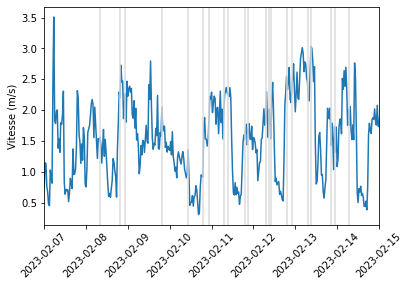

In [15]:
fig = plt.figure()
plt.plot(UN)
#plt.plot(time_meteo, vitesse_dir)
plt.ylabel('Vitesse (m/s)')
tmin=np.datetime64('2023-02-04 18:00:00')
tmax=np.datetime64('2023-02-21 12:00:00')
tmax=np.datetime64('2023-02-15')
tmin=np.datetime64('2023-02-07')
#plt.legend()
plt.xlim(tmin,tmax)
plt.axvline(p1, color='gainsboro')
plt.axvline(p2, color='gainsboro')
plt.axvline(p3, color='gainsboro')
plt.axvline(p4, color='gainsboro')
plt.axvline(p5, color='gainsboro')
plt.axvline(p6, color='gainsboro')
plt.axvline(p7, color='gainsboro')
plt.axvline(p8, color='gainsboro')
plt.axvline(p9, color='gainsboro')
plt.axvline(p10, color='gainsboro')
plt.axvline(p11, color='gainsboro')
plt.axvline(p12, color='gainsboro')
plt.axvline(p13, color='gainsboro')
plt.axvline(p14, color='gainsboro')
plt.axvline(p15, color='gainsboro')
plt.axvline(p16, color='gainsboro')
plt.axvline(p17, color='gainsboro')
plt.axvline(p18, color='gainsboro')
plt.axvline(t1, color='gainsboro')
plt.axvline(t2, color='gainsboro')
plt.axvline(p19, color='gainsboro')
plt.axvline(p20, color='gainsboro')
plt.axvline(p21, color='gainsboro')
plt.axvline(p22, color='gainsboro')
plt.axvline(p23, color='gainsboro')
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("U_GC_3m5.pdf", bbox_inches='tight')

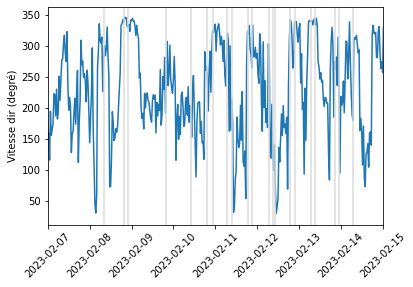

In [16]:
fig = plt.figure()
#plt.plot(time_meteo, vitesse_norm)
#for j in range(n): 
#    if vitesse_dir[j]>270:
#        vitesse_dir[j]=vitesse_dir[j]-360
plt.plot(UD)
plt.ylabel('Vitesse dir (degré)')
#tmin=np.datetime64('2023-02-10')
#tmax=np.datetime64('2023-02-12')
#plt.legend()
plt.xlim(tmin,tmax)
plt.axvline(p1, color='gainsboro')
plt.axvline(p2, color='gainsboro')
plt.axvline(p3, color='gainsboro')
plt.axvline(p4, color='gainsboro')
plt.axvline(p5, color='gainsboro')
plt.axvline(p6, color='gainsboro')
plt.axvline(p7, color='gainsboro')
plt.axvline(p8, color='gainsboro')
plt.axvline(p9, color='gainsboro')
plt.axvline(p10, color='gainsboro')
plt.axvline(p11, color='gainsboro')
plt.axvline(p12, color='gainsboro')
plt.axvline(p13, color='gainsboro')
plt.axvline(p14, color='gainsboro')
plt.axvline(p15, color='gainsboro')
plt.axvline(p16, color='gainsboro')
plt.axvline(p17, color='gainsboro')
plt.axvline(p18, color='gainsboro')
plt.axvline(t1, color='gainsboro')
plt.axvline(t2, color='gainsboro')
plt.axvline(p19, color='gainsboro')
plt.axvline(p20, color='gainsboro')
plt.axvline(p21, color='gainsboro')
plt.axvline(p22, color='gainsboro')
plt.axvline(p23, color='gainsboro')
#base = datetime(2023, 2, 3,1,0)
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("Dir_GC_3m5.pdf", bbox_inches='tight')

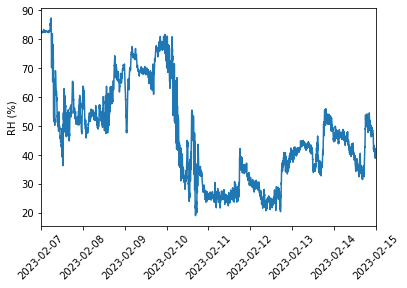

In [19]:
fig = plt.figure()
plt.plot(time_meteo, rhumidite)
plt.ylabel('RH (%)')
plt.xlim(tmin,tmax)
#plt.xlim(datetime(2023,2,3,12), datetime(2023,2,21,22))
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("RH_GC_2m5.pdf", bbox_inches='tight')
#fig.savefig("RH_Clairiere_2m.pdf", bbox_inches='tight')

In [10]:
file_path = 'sonicdata.nc'
#file_path = '/Users/cbrun/Documents//UFR/M2_CLA/DATA_2022_13dec/meteo_2022_12_13.nc'
r5 = nc.Dataset(file_path, 'r', format='NETCDF4')
print(r5)
print(r5['time'][:])
print(r5['u_csat'][:])
print(r5['temp_csat'][:])
#time_meteo=r5['time'][:]
time_sonic = pd.to_datetime(r5['time'][:])
vitesse_y = -r5['u_csat'][:]
vitesse_x = r5['v_csat'][:]
vitesse_z = r5['w_csat'][:]
temperature_s=r5['temp_csat'][:]
print(time_sonic)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): t(28904708)
    variables(dimensions): float64 time(t), float64 u_csat(t), float64 v_csat(t), float64 w_csat(t), float64 temp_csat(t)
    groups: 
[1.67547075e+18 1.67547075e+18 1.67547075e+18 ... 1.67691660e+18
 1.67691660e+18 1.67691660e+18]
[-0.6189906 -0.6294421 -0.7407935 ...  0.2801172  0.3263296  0.419395 ]
[2.288116 2.177704 2.241669 ... 7.062042 6.993256 6.903351]
DatetimeIndex([   '2023-02-04 00:32:26.200000',
               '2023-02-04 00:32:26.249999872',
                  '2023-02-04 00:32:26.300000',
               '2023-02-04 00:32:26.350000128',
                  '2023-02-04 00:32:26.400000',
               '2023-02-04 00:32:26.449999872',
                  '2023-02-04 00:32:26.500000',
               '2023-02-04 00:32:26.550000128',
                  '2023-02-04 00:32:26.600000',
               '2023-02-04 00:32:26.649999872',
               ...
                

In [11]:
series = pd.Series(temperature_s,index=time_sonic)
series = series.sort_index()
#df = pd.DataFrame(temperature,index=time_meteo)
#df = df.sort_index()
series2=series.truncate(after='2023-02-08 19:11:54')
series3=series.truncate(before='2023-02-08 19:12:19.9')
#df = pd.DataFrame({'s': series})
#Tmean = df.asfreq(freq='60S')
#print(series2)
#print(series3)
#print(df)
#pd.date_range(start='4/2/2023', stop='20/2/2023',freq='60S')
#df[df.index.duplicated()]
T2 = series2.asfreq(freq='2min')
T3 = series3.asfreq(freq='2min')
Tmean2 = series2.resample('2min').mean()
Tmean3 = series3.resample('2min').mean()
T1h2 = series2.resample('1H').mean()
T1h3 = series3.resample('1H').mean()
series[series.index.duplicated()]
#Tmean = series.asfreq(freq='2min')
#print(Tmean2)
#print(Tmean3)


2023-02-08 19:11:54.049999872   -5.125610
2023-02-08 19:11:54.100000000   -6.480713
2023-02-08 19:11:54.150000128   -6.566711
2023-02-08 19:11:54.200000000   -6.543304
2023-02-08 19:11:54.249999872   -6.151276
                                   ...   
2023-02-08 19:12:19.649999872   -6.108704
2023-02-08 19:12:19.700000000   -5.807709
2023-02-08 19:12:19.750000128   -5.828278
2023-02-08 19:12:19.800000000   -6.243225
2023-02-08 19:12:19.849999872   -5.874664
Length: 517, dtype: float64

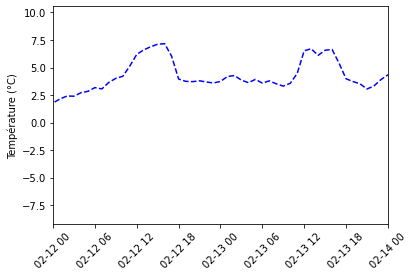

In [12]:
fig = plt.figure()
plt.plot(T1h2,'b--')
plt.plot(T1h3,'b--')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Température (°C)')
tmin=np.datetime64('2023-02-12')
tmax=np.datetime64('2023-02-14')
#plt.legend()
plt.xlim(tmin,tmax)
#plt.xlim(datetime(2023,2,3,12), datetime(2023,2,21,22))
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("T1H_GC_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

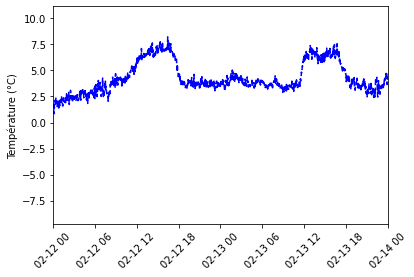

In [13]:
fig = plt.figure()
plt.plot(Tmean2,'b--')
plt.plot(Tmean3,'b--')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Température (°C)')
#tmin=np.datetime64('2023-02-08')
#tmax=np.datetime64('2023-02-14')
plt.xlim(tmin,tmax)
#plt.xlim(datetime(2023,2,3,12), datetime(2023,2,21,22))
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("T_GC_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

In [14]:
#vitesse_x = r5['v_csat'][:]
#range=pd.date_range("2023-02-04", "2023-02-20", freq="2min")
Useries = pd.Series(vitesse_x,index=time_sonic)
Useries = Useries.sort_index()
#df = pd.DataFrame(temperature,index=time_meteo)
#df = df.sort_index()
Useries2=Useries.truncate(after='2023-02-08 19:11:54')
Useries3=Useries.truncate(before='2023-02-08 19:12:19.9')
#df = pd.DataFrame({'s': series})
#Tmean = df.asfreq(freq='60S')
#print(series2)
#print(series3)
#print(df)
#pd.date_range(start='4/2/2023', stop='20/2/2023',freq='60S')
Useries[Useries.index.duplicated()]
Umean2 = Useries2.resample('2min').mean()
Umean3 = Useries3.resample('2min').mean()
#series[series.index.duplicated()]
#Tmean = series.asfreq(freq='2min')
#print(Tmean2)
#print(Tmean3)

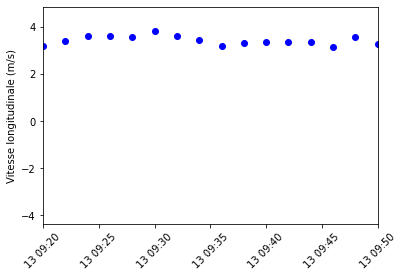

In [15]:
fig = plt.figure()
plt.plot(Umean2,'bo')
plt.plot(Umean3,'bo')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Vitesse longitudinale (m/s)')
tmin=np.datetime64('2023-02-13 09:20:00')
tmax=np.datetime64('2023-02-13 09:50:00')
plt.xlim(tmin,tmax)
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("U_GC_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

In [16]:
#vitesse_x = r5['v_csat'][:]
#range=pd.date_range("2023-02-04", "2023-02-20", freq="2min")
Wseries = pd.Series(vitesse_z,index=time_sonic)
Wseries = Wseries.sort_index()
#df = pd.DataFrame(temperature,index=time_meteo)
#df = df.sort_index()
Wseries2=Wseries.truncate(after='2023-02-08 19:11:54')
Wseries3=Wseries.truncate(before='2023-02-08 19:12:19.9')
#df = pd.DataFrame({'s': series})
#Tmean = df.asfreq(freq='60S')
#print(series2)
#print(series3)
#print(df)
#pd.date_range(start='4/2/2023', stop='20/2/2023',freq='60S')
Wseries[Wseries.index.duplicated()]
Wmean2 = Wseries2.resample('2min').mean()
Wmean3 = Wseries3.resample('2min').mean()
#series[series.index.duplicated()]
#Tmean = series.asfreq(freq='2min')
#print(Tmean2)
#print(Tmean3)

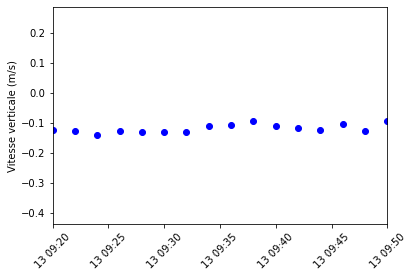

In [17]:
fig = plt.figure()
plt.plot(Wmean2,'bo')
plt.plot(Wmean3,'bo')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Vitesse verticale (m/s)')
#tmin=np.datetime64('2023-02-11')
#tmax=np.datetime64('2023-02-14')
plt.xlim(tmin,tmax)
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("W_GC_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

In [18]:
#vitesse_x = r5['v_csat'][:]
#range=pd.date_range("2023-02-04", "2023-02-20", freq="2min")
Vseries = pd.Series(vitesse_y,index=time_sonic)
Vseries = Vseries.sort_index()
#df = pd.DataFrame(temperature,index=time_meteo)
#df = df.sort_index()
Vseries2=Vseries.truncate(after='2023-02-08 19:11:54')
Vseries3=Vseries.truncate(before='2023-02-08 19:12:19.9')
#df = pd.DataFrame({'s': series})
#Tmean = df.asfreq(freq='60S')
#print(series2)
#print(series3)
#print(df)
#pd.date_range(start='4/2/2023', stop='20/2/2023',freq='60S')
Vseries[Vseries.index.duplicated()]
Vmean2 = Vseries2.resample('2min').mean()
Vmean3 = Vseries3.resample('2min').mean()
#series[series.index.duplicated()]
#Tmean = series.asfreq(freq='2min')
#print(Tmean2)
#print(Tmean3)

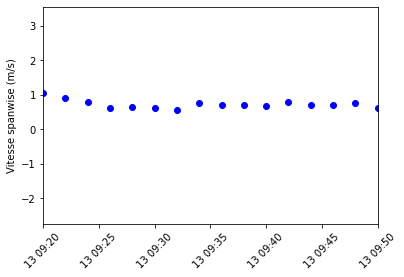

In [20]:
fig = plt.figure()
plt.plot(Vmean2,'bo')
plt.plot(Vmean3,'bo')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Vitesse spanwise (m/s)')
#tmin=np.datetime64('2023-02-08')
#tmax=np.datetime64('2023-02-14')
plt.xlim(tmin,tmax)
#plt.xlim(datetime(2023,2,3,12), datetime(2023,2,21,22))
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("V_GC_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

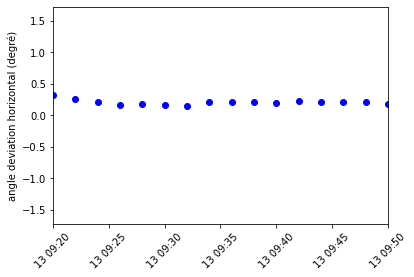

In [21]:
alpha2=np.arctan(Vmean2/Umean2)
alpha3=np.arctan(Vmean3/Umean3)
fig = plt.figure()
plt.plot(alpha2,'bo')
plt.plot(alpha3,'bo')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('angle deviation horizontal (degré)')
#tmin=np.datetime64('2023-02-11')
#tmax=np.datetime64('2023-02-14')
plt.xlim(tmin,tmax)
#plt.xlim(datetime(2023,2,3,12), datetime(2023,2,21,22))
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("alpha_GC_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

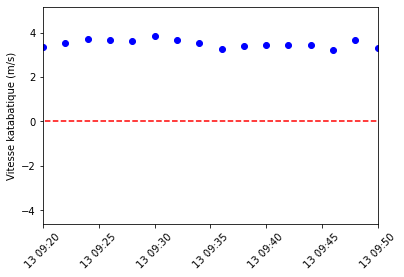

In [23]:
Ukat2=Umean2*np.cos(alpha2)+Vmean2*np.sin(alpha2)
Ukat3=Umean3*np.cos(alpha3)+Vmean3*np.sin(alpha3)
Vkat2=-Umean2*np.sin(alpha2)+Vmean2*np.cos(alpha2)
Vkat3=-Umean3*np.sin(alpha3)+Vmean3*np.cos(alpha3)
Unorm2=np.sqrt(Umean2**2+Vmean2**2)
Unorm3=np.sqrt(Umean3**2+Vmean3**2)
fig = plt.figure()
plt.plot(Ukat2,'bo')
plt.plot(Ukat3,'bo')
plt.plot(Vkat2,'r--')
plt.plot(Vkat3,'r--')
#plt.plot(Unorm2,'g--')
#plt.plot(Unorm3,'g--')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Vitesse katabatique (m/s)')
#tmin=np.datetime64('2023-02-11')
#tmax=np.datetime64('2023-02-14')
plt.xlim(tmin,tmax)
#plt.xlim(datetime(2023,2,3,12), datetime(2023,2,21,22))
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("Ukat_GC_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

In [7]:
#file_path = 'DATA_2022_08nov/sonicdata_2022_11_07_1356.dat'
file_path = '/Users/cbrun/Documents/PROJETS/GC2014/DATA_GC2015/TOA5_TOB1_2095.kacosonic_csat_2015_04_11_0000.dat'
#file_path = '/Users/cbrun/Documents/PROJETS/GC2014/DATA_GC2015/Campagne_complete_CSAT.dat'
data_sonic = pd.read_csv(file_path, header=1)[0::]
print(data_sonic)
#time_sonic = pd.to_datetime(data_sonic['TIMESTAMP'])
#pitch = data_meteo['csatB_Pitch'].astype(float)
#roll = data_meteo['csatB_Roll'].astype(float)
csat_u = data_sonic['Ux_1']#.astype(float) 
csat_v = data_sonic['Uy_1']#.astype(float) 
csat_w = data_sonic['Uz_1']#.astype(float) 
csat_t = data_sonic['T_sonic_1']#.astype(float) 
csat_y = data_sonic['YEAR']
csat_m = data_sonic['MONTH']
csat_d = data_sonic['DAY']
csat_h = data_sonic['HOUR']
csat_mi = data_sonic['MINUTE']
csat_s = data_sonic['SECOND']
#csat_n= data_sonic['RECORD'].astype(float)
#time_sonic= data_sonic['RECORD']/20.
time= pd.DataFrame({'year': csat_y, 'month': csat_m , 
                  'day': csat_d, 'hour': csat_h, 
                  'minute': csat_mi, 'second': csat_s} )
print(time)
time_sonic = pd.to_datetime(time, unit='s')
print(time_sonic)
#print(data_sonic)
#print(pression)
#print(np.shape(data_sonic))

         YEAR  MONTH  DAY  HOUR  MINUTE  SECOND    RECORD     Ux_1     Uy_1  \
0        2015      4   11     0       0    0.05  86967737  1.36525 -0.05500   
1        2015      4   11     0       0    0.10  86967738  1.38675 -0.02325   
2        2015      4   11     0       0    0.15  86967739  1.33375 -0.01400   
3        2015      4   11     0       0    0.20  86967740  1.39050  0.07175   
4        2015      4   11     0       0    0.25  86967741  1.32025  0.00925   
...       ...    ...  ...   ...     ...     ...       ...      ...      ...   
1727995  2015      4   11    23      59   59.80  88695732  2.87225 -0.05750   
1727996  2015      4   11    23      59   59.85  88695733  2.83850  0.03800   
1727997  2015      4   11    23      59   59.90  88695734  2.87450  0.02300   
1727998  2015      4   11    23      59   59.95  88695735  2.90925  0.05775   
1727999  2015      4   12     0       0    0.00  88695736  2.88725 -0.11400   

            Uz_1  ...     Uy_2     Uz_2  T_sonic_2 

In [10]:
#ds = nc.Dataset('DATA_2022_08nov/sonicdata_2022_11_07_1356.nc', 'w', format='NETCDF4')
file_path = '/Users/cbrun/Documents/PROJETS/GC2014/DATA_GC2015/sonicdata.nc'
ds = nc.Dataset(file_path, 'w', format='NETCDF4')

ds.createDimension('t', 1728000)

ti = ds.createVariable('time', 'f8', ('t'))
u = ds.createVariable('u_csat', 'f8', ('t'))
v = ds.createVariable('v_csat', 'f8', ('t'))
w  = ds.createVariable('w_csat', 'f8', ('t'))
temp  = ds.createVariable('temp_csat', 'f8', ('t'))

ti[:] = time_sonic
u[:] = csat_u
v[:] = csat_v
w[:] = csat_w
temp[:] = csat_t
ds.close()

In [31]:
file_path = '/Users/cbrun/Documents/PROJETS/GC2014/DATA_GC2015/sonicdata.nc'
#file_path = '/Users/cbrun/Documents//UFR/M2_CLA/DATA_2022_13dec/meteo_2022_12_13.nc'
r6 = nc.Dataset(file_path, 'r', format='NETCDF4')
print(r6)
print(r6['time'][:])
print(r6['u_csat'][:])
print(r6['temp_csat'][:])
#time_meteo=r6['time'][:]
time_meteo = pd.to_datetime(r6['time'][:])
vitesse_x = r6['u_csat'][:]
vitesse_y = r6['w_csat'][:]
vitesse_z = r6['v_csat'][:]
temperature=r6['temp_csat'][:]
print(time_meteo)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): t(1728000)
    variables(dimensions): float64 time(t), float64 u_csat(t), float64 v_csat(t), float64 w_csat(t), float64 temp_csat(t)
    groups: 
[1.4287104e+18 1.4287104e+18 1.4287104e+18 ... 1.4287968e+18 1.4287968e+18
 1.4287968e+18]
[1.36525 1.38675 1.33375 ... 2.8745  2.90925 2.88725]
[3.306152 3.349274 3.389069 ... 5.473541 5.501862 5.536835]
DatetimeIndex(['2015-04-11 00:00:00.049999872',
                  '2015-04-11 00:00:00.100000',
               '2015-04-11 00:00:00.150000128',
                  '2015-04-11 00:00:00.200000',
               '2015-04-11 00:00:00.249999872',
                  '2015-04-11 00:00:00.300000',
               '2015-04-11 00:00:00.350000128',
                  '2015-04-11 00:00:00.400000',
               '2015-04-11 00:00:00.449999872',
                  '2015-04-11 00:00:00.500000',
               ...
               '2015-04-11 23:59:59.55000

In [32]:
#range=pd.date_range("2023-02-04", "2023-02-20", freq="2min")
series = pd.Series(temperature,index=time_meteo)
series = series.sort_index()
df = pd.DataFrame(temperature,index=time_meteo)
df = df.sort_index()
#series2=series.truncate(after='1970-01-01 00:00:00.003478709')
#series3=series.truncate(before='1970-01-01 00:00:00.003547829')
#df = pd.DataFrame({'s': series})
#Tmean = df.asfreq(freq='60S')
print(series)
#print(series3)
#print(df)
#pd.date_range(start='4/2/2023', stop='20/2/2023',freq='60S')
df[df.index.duplicated()]
#T2 = series2.asfreq(freq='2min')
Tmean = series.resample('2min').mean()
#T1h = series.resample('1H').mean()
#series[series.index.duplicated()]
#Tmean = series.asfreq(freq='2min')
#print(Tmean2)
#print(Tmean3)


2015-04-11 00:00:00.049999872    3.306152
2015-04-11 00:00:00.100000000    3.349274
2015-04-11 00:00:00.150000128    3.389069
2015-04-11 00:00:00.200000000    3.316132
2015-04-11 00:00:00.249999872    3.324432
                                   ...   
2015-04-11 23:59:59.800000000    5.468506
2015-04-11 23:59:59.849999872    5.508514
2015-04-11 23:59:59.900000000    5.473541
2015-04-11 23:59:59.950000128    5.501862
2015-04-12 00:00:00.000000000    5.536835
Length: 1728000, dtype: float64


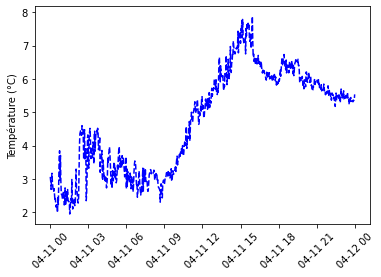

In [33]:
fig = plt.figure()
plt.plot(Tmean,'b--')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Température (°C)')
#plt.xlim(tmin,tmax)
#plt.xlim(datetime(2023,2,3,12), datetime(2023,2,21,22))
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("T_GC2015_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

In [34]:
#vitesse_x = r5['v_csat'][:]
#range=pd.date_range("2023-02-04", "2023-02-20", freq="2min")
Useries = pd.Series(vitesse_x,index=time_meteo)
Useries = Useries.sort_index()
#df = pd.DataFrame(temperature,index=time_meteo)
#df = df.sort_index()
#Useries2=Useries.truncate(after='2023-02-08 19:11:54')
#Useries3=Useries.truncate(before='2023-02-08 19:12:19.9')
#df = pd.DataFrame({'s': series})
#Tmean = df.asfreq(freq='60S')
#print(series2)
#print(series3)
#print(df)
#pd.date_range(start='4/2/2023', stop='20/2/2023',freq='60S')
Useries[Useries.index.duplicated()]
Umean = Useries.resample('2min').mean()
#Umean3 = Useries3.resample('2min').mean()
#series[series.index.duplicated()]
#Tmean = series.asfreq(freq='2min')
#print(Tmean2)
#print(Tmean3)

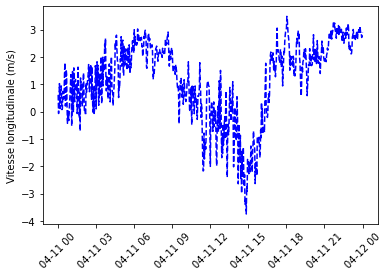

In [35]:
fig = plt.figure()
plt.plot(Umean,'b--')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Vitesse longitudinale (m/s)')
#tmin=np.datetime64('2023-02-08')
#tmax=np.datetime64('2023-02-14')
#plt.xlim(tmin,tmax)
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("U_GC2015_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

In [36]:
#vitesse_x = r5['v_csat'][:]
#range=pd.date_range("2023-02-04", "2023-02-20", freq="2min")
Vseries = pd.Series(vitesse_y,index=time_meteo)
Vseries = Vseries.sort_index()
#df = pd.DataFrame(temperature,index=time_meteo)
#df = df.sort_index()
#Useries2=Useries.truncate(after='2023-02-08 19:11:54')
#Useries3=Useries.truncate(before='2023-02-08 19:12:19.9')
#df = pd.DataFrame({'s': series})
#Tmean = df.asfreq(freq='60S')
#print(series2)
#print(series3)
#print(df)
#pd.date_range(start='4/2/2023', stop='20/2/2023',freq='60S')
Vseries[Vseries.index.duplicated()]
Vmean = Vseries.resample('2min').mean()
#Umean3 = Useries3.resample('2min').mean()
#series[series.index.duplicated()]
#Tmean = series.asfreq(freq='2min')
#print(Tmean2)
#print(Tmean3)

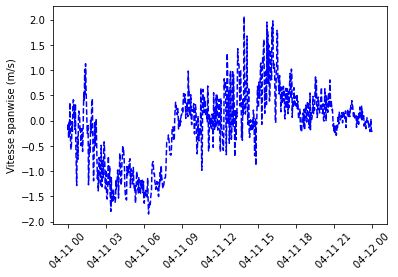

In [37]:
fig = plt.figure()
plt.plot(Vmean,'b--')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Vitesse spanwise (m/s)')
#tmin=np.datetime64('2023-02-08')
#tmax=np.datetime64('2023-02-14')
#plt.xlim(tmin,tmax)
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("V_GC2015_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')

In [38]:
#vitesse_x = r5['v_csat'][:]
#range=pd.date_range("2023-02-04", "2023-02-20", freq="2min")
Wseries = pd.Series(vitesse_z,index=time_meteo)
Wseries = Wseries.sort_index()
#df = pd.DataFrame(temperature,index=time_meteo)
#df = df.sort_index()
#Useries2=Useries.truncate(after='2023-02-08 19:11:54')
#Useries3=Useries.truncate(before='2023-02-08 19:12:19.9')
#df = pd.DataFrame({'s': series})
#Tmean = df.asfreq(freq='60S')
#print(series2)
#print(series3)
#print(df)
#pd.date_range(start='4/2/2023', stop='20/2/2023',freq='60S')
Wseries[Wseries.index.duplicated()]
Wmean = Wseries.resample('2min').mean()
#Umean3 = Useries3.resample('2min').mean()
#series[series.index.duplicated()]
#Tmean = series.asfreq(freq='2min')
#print(Tmean2)
#print(Tmean3)

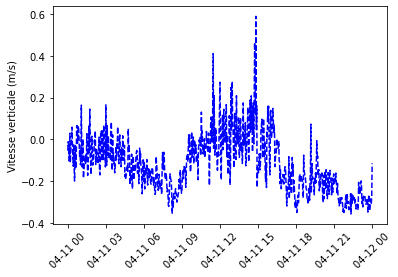

In [39]:
fig = plt.figure()
plt.plot(Wmean,'b--')
#plt.plot(time_meteo, temperature_surf,'r--')
plt.ylabel('Vitesse verticale (m/s)')
#tmin=np.datetime64('2023-02-08')
#tmax=np.datetime64('2023-02-14')
#plt.xlim(tmin,tmax)
#ax = plt.gca()
#hours = dates.HourLocator()
#dfmt = dates.DateFormatter('%H:%M')
plt.xticks(rotation=45)
fig.savefig("W_GC2015_sonic.pdf", bbox_inches='tight')
#fig.savefig("T_Clairiere_2m.pdf", bbox_inches='tight')